<center>
<img src="logo.png" height="900"> 
</center>


#  Акции

В этом задании мы немного поработаем с ценами на акции. 

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

В табличке `prices.tsv` лежат данные о том как менялась цена на акции из индексов [S&P-500](https://ru.wikipedia.org/wiki/S%26P_500), [NASDAQ-100](https://ru.wikipedia.org/wiki/Nasdaq-100) и [DJI](https://ru.wikipedia.org/wiki/Промышленный_индекс_Доу_—_Джонса) в течение последних $10$ лет. В табличке `information.tsv` лежит дополнительная полезная информация по каждой из ценных бумаг.  Подгрузим эти таблицы и посмотрим на них. 

In [2]:
df_prices = pd.read_csv('price.tsv', sep='\t')

# сделали дату индексом таблицы и применили это преобразование
df_prices.set_index('Date', inplace=True)  
df_prices.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-08-02,18.982769,10.030768,51.945328,32.324974,NaN,26.103115,11.17,17.431229,32.489162,29.600000,...,43.086357,28.942909,21.664534,NaN,24.980757,49.945686,27.59,20.329309,NaN,NaN
2010-08-03,18.337280,10.049624,51.148121,32.334858,NaN,25.590956,10.97,17.490696,32.223312,29.120001,...,43.628933,29.177372,21.289482,NaN,24.594522,50.279709,27.40,20.080635,NaN,NaN
2010-08-04,18.633682,9.455699,51.877274,32.464500,NaN,25.915325,10.50,17.553665,32.497211,29.700001,...,43.628933,29.674450,21.488039,NaN,24.808437,50.873531,28.09,20.089518,NaN,NaN
2010-08-05,18.745655,9.088029,52.373096,32.306469,NaN,25.898251,10.26,17.483702,32.199158,29.440001,...,43.621983,29.590042,21.267420,NaN,25.200619,50.567337,30.35,19.636568,NaN,NaN
2010-08-06,18.923494,8.946616,51.284237,32.107712,NaN,25.812889,9.98,17.690086,32.440819,29.230000,...,43.107220,29.599421,21.157112,NaN,25.170906,50.084862,30.24,19.227848,NaN,NaN


In [3]:
df_inf = pd.read_csv('information.tsv', sep='\t')
df_inf.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded,S&P-500,NASDAQ,DJI
0,A,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",05.06.00,1090872.0,1999.0,True,False,False
1,AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",23.03.15,6201.0,1934.0,True,False,False
2,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",09.07.15,1158449.0,1932.0,True,False,False
3,AAPL,Apple Inc.,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",30.11.82,320193.0,1977.0,True,True,True
4,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31.12.12,1551152.0,1888.0,True,False,False


> Давайте решим пробную задачку, чтобы вы понимали, как устроена система тестирования. 

В колонках `'S&P-500', 'NASDAQ', 'DJI'` лежит True, если ценная бумага входит в соотвествующий индекс. Сколько ценных бумаг из таблицы входили в индекс NASDAQ? Запишите результат в пременную `n_nasdaq`.

In [4]:
n_nasdaq = df_inf['NASDAQ'].sum() # каждое True это 1, а False 0
n_nasdaq

103

Все ваши расчёты будут тестироваться с помощью вот таких тестов. 

In [5]:
assert n_nasdaq == 103

Мы положили в переменную `n_nasdaq` число ценных бумаг, как и требовалось в задании. Тесты прошли и всё успешно отработало. Подобные тесты сделаны по каждому заданию, но скрыты от вас. Вы довольно часто будете видеть ячейки с комментарием: 

In [6]:
# проверка, что задание решено корректно

Он означает, что внутри этой ячейки есть секретные тесты, которые сами запустятся, когда нажмёте на кнопку __Submit assignment.__

__а)__ Теперь настоящее задание. Сколько ценных бумаг входят во все три индекса сразу?

In [18]:
df_inf.shape

(525, 12)

In [30]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Формат ответа: целое число, пример: 7
n_sp = ((df_inf['NASDAQ'] == True)&(df_inf['S&P-500'] == True)&(df_inf['DJI'] == True)).sum()

In [31]:
# проверка, что задание решено корректно
assert n_sp < 10

# Подобные тесты скрыты от вас
### BEGIN HIDDEN TESTS
assert np.abs(n_sp - 5) < 1e-5
### END HIDDEN TESTS

__б)__ В колонке `Founded` записан год основания компании. Сколько компаний из индекса S&P-500 были основаны в 19 веке (1900 год относится к 20 веку)? 

In [37]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Формат ответа: целое число, пример: 91
n_founded = ((df_inf['S&P-500'] == True)&(1800 <= df_inf['Founded'])&(df_inf['Founded'] < 1900)).sum()


In [38]:
# проверка, что задание решено корректно
assert n_founded < 100
assert n_founded > 90

# Подобные тесты скрыты от вас
### BEGIN HIDDEN TESTS
assert np.abs(n_founded - 95) < 1e-5
### END HIDDEN TESTS

__в)__  В колонке `GICS Sector` находится сектор экономики, в котором работает компания. Сколько всего уникальных секторов представлено в данных? Все пропуски в этой колонке удалите методом `.dropna()`. 

In [47]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Формат ответа: целое число, пример: 10
n_sectors = df_inf['GICS Sector'].dropna().unique().size


In [48]:
# проверка, что задание решено корректно
assert n_sectors > 5
assert n_sectors < 15

# Подобные тесты скрыты от вас
### BEGIN HIDDEN TESTS
assert np.abs(n_sectors - 11) < 1e-5
### END HIDDEN TESTS

__г)__ Сколько компаний из индекса S&P-500 в сумме приходится на $3$ самых крупных сектора? 

In [67]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Формат ответа: целое число, пример: 205
big_sectors = list(df_inf['GICS Sector'].value_counts()[:3].index)
n_top3  = (df_inf['GICS Sector'].isin(big_sectors)).sum()

n_top3

210

In [68]:
# проверка, что задание решено корректно
assert n_top3 < 300
assert n_top3 > 200

# Подобные тесты скрыты от вас
### BEGIN HIDDEN TESTS
assert np.abs(n_top3 - 210) < 1e-5
### END HIDDEN TESTS

__д)__ У скольки компаний тикер (краткое название из колонки `Symbol`) состоит из трёх букв? 

In [82]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Формат ответа: целое число, пример: 322
n_ticker  = (df_inf['Symbol'].apply(len) == 3).sum()


In [83]:
# проверка, что задание решено корректно
assert n_ticker > 300
assert n_ticker < 400

# Подобные тесты скрыты от вас
### BEGIN HIDDEN TESTS
assert np.abs(n_ticker - 308) < 1e-5
### END HIDDEN TESTS

А из другого количества букв? Заведите колонку `letter_count` с числом букв в тикере, а после подсчитайте как часто в ней встречаются разные значения. 

In [84]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
df_inf['letter_count'] = df_inf['Symbol'].apply(len)

Создайте в таблице новую колонку `first_letter`. Запишите туда первую букву каждого тикера из колонки `Symbol`. Какая буква встречается на первом месте чаще всего? 

In [94]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Формат ответа: строка, пример: 'B'
df_inf['first_letter'] = df_inf['Symbol'].str[0]
popular_letter = list(df_inf['first_letter'].value_counts().index)[0]
popular_letter

'A'

In [95]:
# проверка, что задание решено корректно
assert popular_letter not in {'T', 'C', 'M', 'P', 'D'}

# Подобные тесты скрыты от вас
### BEGIN HIDDEN TESTS
assert popular_letter == 'A'
### END HIDDEN TESTS

__е)__ Теперь поработаем со стоимостью акций. 

- Из таблицы `df_inf` возьмите колонку `Symbol` и сохраните значения из неё, `.values`, в вектор tickers
- Выберите из вектора 10 случайных тикеров командой `np.random.choice`, опцию `replace` установить в `False`, нам нужна выборка без повторений

In [125]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Формат ответа: целое число, пример: 505
tickers = df_inf['Symbol'].values

# Формат ответа: массив из тикеров, пример: ['TSLA', 'AAPL', 'GOOG']
tickers10 = np.random.choice(tickers, 10, replace=False)


In [126]:
# проверка, что задание решено корректно
assert tickers.size > 500
assert tickers.size < 550

# Подобные тесты скрыты от вас
### BEGIN HIDDEN TESTS
assert tickers.size == 525
### END HIDDEN TESTS

Методом `.plot` постройте для выбранных 10 тикеров картинку с динамикой их цен. В скобках у `.plot()` допишите `figsize=(12,7)`, чтобы отрегулировать размер картинки.

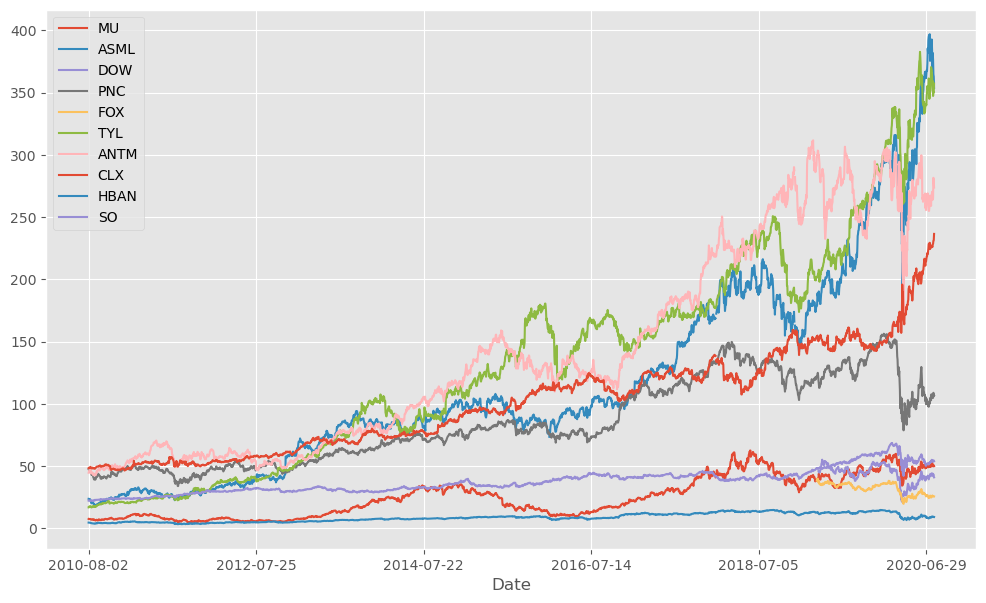

In [127]:
df_prices_tikers10 = df_prices[tickers10]

df_prices_tikers10.plot(figsize=(12,7))
plt.show()

Методом `.hist()` постройте для этих цен гистограммы. Выберите количество бинов `bins` равное $25$, опцию `density` поставьте в `True`. Это отнормирует высоту столбиков так, чтобы сумма площадей под ними была равна единице. 

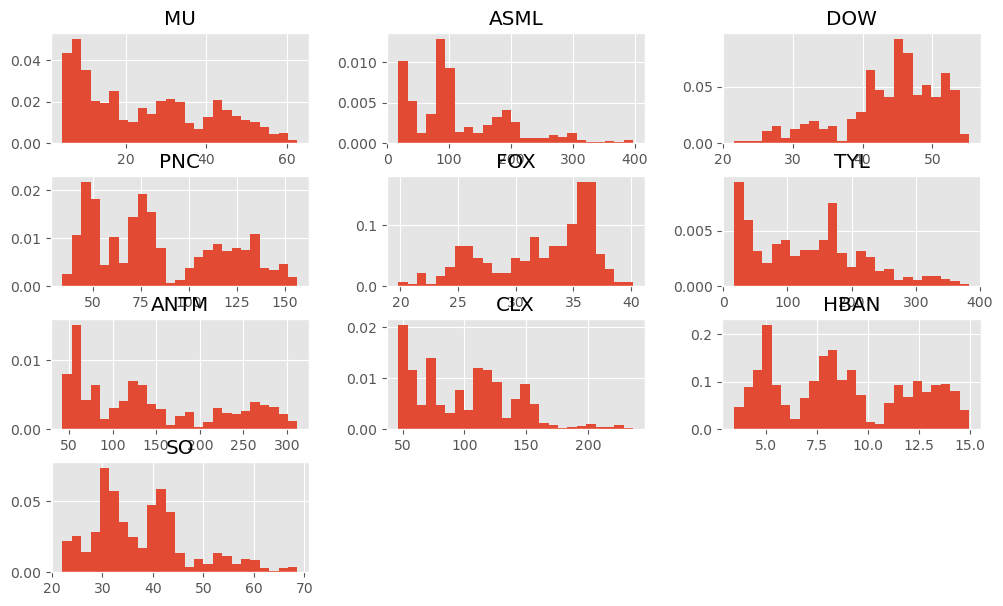

In [128]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
df_prices_tikers10.hist(bins=25, density=True, figsize=(12,7))
plt.show()

- Как скорее всего распределена стоимость акций?
- Что происходило с финансовыми рынками в течение последних $10$ лет? Они росли? Они падали? Видно ли, что были кризисы? 

Финансовые продукты характеризуются двумя основными характеристикам – __доходностью__ и __риском.__ Доходность – это процентное изменение стоимости за некоторый промежуток времени. Мы будем работать с доходностями за день: 

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Перейдите к доходностям для всей таблицы `df_prices`. Для того, чтобы посчитать разность между каждой строкой таблицы и предыдущей строкой, используйте команду `.diff()`. Чтобы сдвинуть все строки на одну вниз, используйте команду `shift(1)`.  

Поделите результат работы команды `diff` на результат работы команды `shift`. Обратите внимание, что в первой колонке теперь все значения `NaN`, так как мы не можем посчитать доходность для самого первого дня. Удалите из таблицы эту строку. 

In [130]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

df_r = df_prices.diff()[1:] / df_prices.shift(1)[1:]



In [131]:
# проверка, что задание решено корректно
assert df_r.iloc[0,0] < 1

# Подобные тесты скрыты от вас
### BEGIN HIDDEN TESTS
assert np.abs(df_r.iloc[0,0] + 0.034003929) < 1e-5
### END HIDDEN TESTS

Методом `.plot` постройте для выбранных ранее 10  случайных тикеров картинку с динамикой доходностей. 

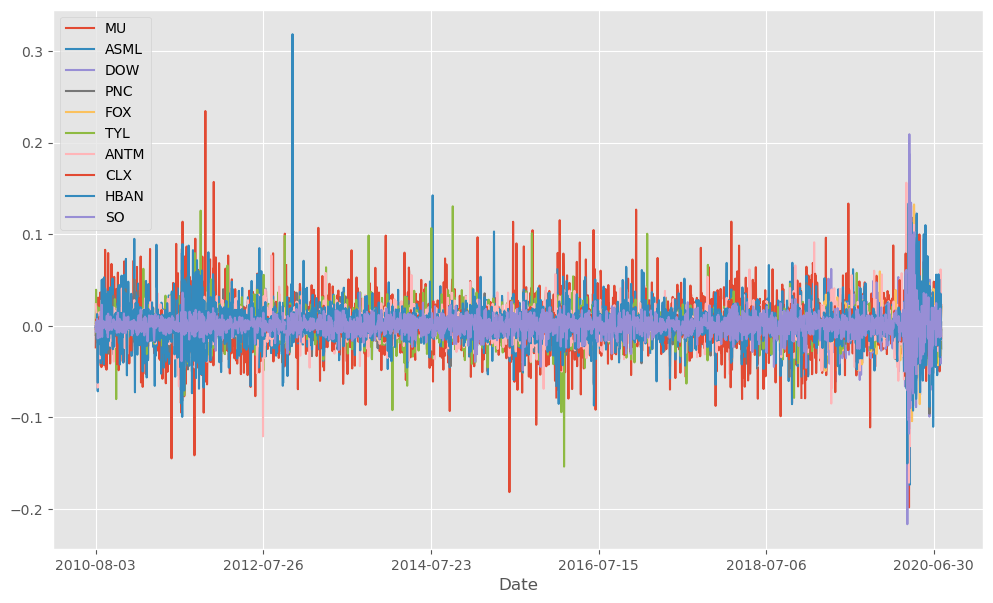

In [137]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

df_r[tickers10].plot(figsize=(12,7))
plt.show()

Постройте для доходностей этих десяти тикеров гистограммы. 

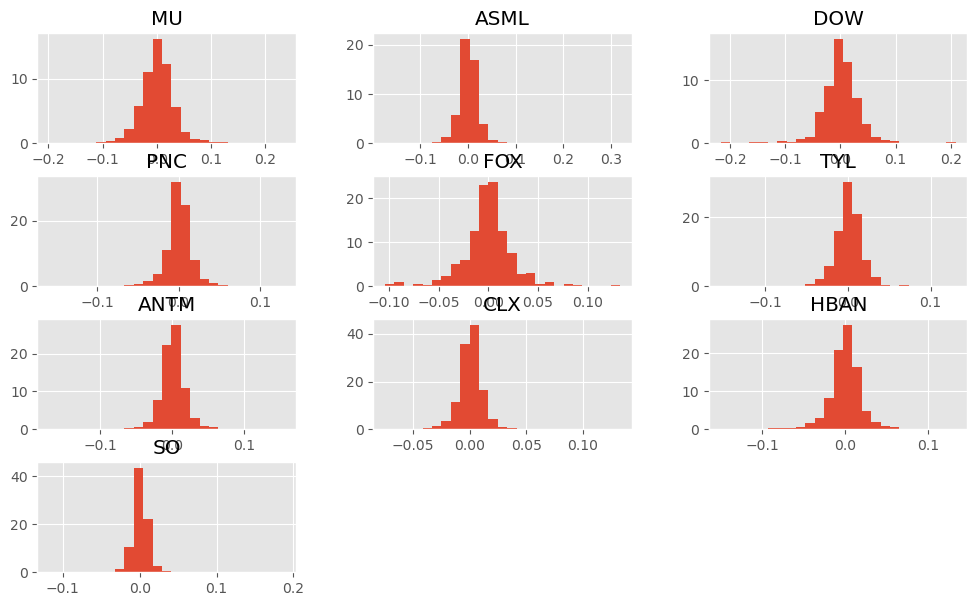

In [138]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
df_r[tickers10].hist(bins=25, density=True, figsize=(12,7))
plt.show()

Постройте для доходностей этих 10 бумаг ящики с усами. Для этого в опциях команды `plot` укажите `'kind'='box'`. 

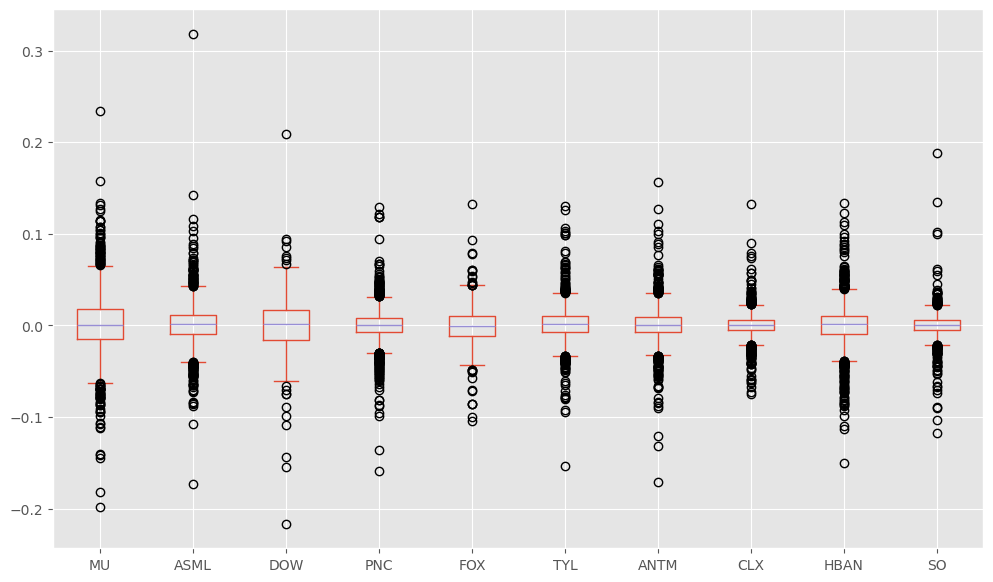

In [141]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

df_r[tickers10].plot(kind='box', figsize=(12,7))
plt.show()

__Выводы:__ 

Доходности по нашим акциям имеют распределение похожее на нормальное, но есть отличие. По ящикам с усами видно, что в данных есть довольно большое количество выбросов. Это сигнализирует о том, что у распределения доходностей хвосты оказываются более тяжёлыми, чем у нормального распределения. То есть под ними сосредоточено больше вероятностной массы и из-за этого редкое события более вероятны, чем для нормального распределения. Такую особенность финансовых данных мы более подробно будем обсуждать в будущем. 

Кроме того, по построенным визуализациям видно, что средние доходности практически для всех ценных бумаг находится близко к нулю.

__ё)__  Без буквы `ё` никуда, скажут нам [Пафнутий Чебышёв](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2,_%D0%9F%D0%B0%D1%84%D0%BD%D1%83%D1%82%D0%B8%D0%B9_%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2%D0%B8%D1%87) и [Лёв Толстой](https://arzamas.academy/special/ruslit/writers/tolstoy).  

Посчитайте для всех компаний среднюю доходность (просто сделайте `.mean()` за весь период). Найдите 10 самых доходных компаний и 10 самых убыточных. 

In [176]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

R  = df_r.mean()

# Формат ответа: массивы из 10 тикеров, отсортированных в ликсикографическом порядке 
# пример: ['CARR', 'DOCU', 'DXCM', 'HWM']
# тип данных должен быть list, не np.array
# метод .values выдаёт данные в формате np.array: array(['CARR', 'DOCU', 'DXCM', 'HWM'])
rtop_10 = sorted(list(R.nlargest(10).index))
rbottom_10 = sorted(list(R.nsmallest(10).index))

rtop_10, rbottom_10

(['CARR', 'DOCU', 'DXCM', 'HWM', 'MRNA', 'OTIS', 'PAYC', 'TSLA', 'TT', 'ZM'],
 ['APA', 'COTY', 'DVN', 'FOX', 'FOXA', 'KHC', 'SLB', 'UA', 'VIAC', 'WRK'])

In [177]:
# проверка, что задание решено корректно
assert 'DXCM' in rtop_10
assert 'HWM' in rtop_10

assert 'SLB' in rbottom_10
assert 'FOX' in rbottom_10

# Подобные тесты скрыты от вас
### BEGIN HIDDEN TESTS
assert sorted(list(rtop_10)) == ['CARR', 'DOCU', 'DXCM', 'HWM', 'MRNA', 'OTIS', 'PAYC', 'TSLA', 'TT', 'ZM']
assert sorted(list(rbottom_10)) == ['APA', 'COTY', 'DVN', 'FOX', 'FOXA', 'KHC', 'SLB', 'UA', 'VIAC', 'WRK']
### END HIDDEN TESTS

Есть ли среди самых доходных компаний Тесла? :) 

__ж)__ Мы поговорили о доходности. Теперь поговорим о риске. Один из способов измерить, насколько ценная бумага рискованная -  использовать стандартное отклонение. 

Посчитайте для всех компаний стандартное отклонение доходности. Найдите 10 самых рискованных компаний и 10 самых безрисковых. 

In [223]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

STD  = df_r.std()

# Формат ответа: массивы из 10 тикеров, отсортированных в ликсикографическом порядке 
# пример: ['CARR', 'DOCU', 'DXCM', 'HWM']
# тип данных должен быть list, не np.array
# метод .values выдаёт данные в формате np.array: array(['CARR', 'DOCU', 'DXCM', 'HWM'])
stdtop_10 = sorted(list(STD.nlargest(10).index))
stdbottom_10 = sorted(list(STD.nsmallest(10).index))

stdtop_10, stdbottom_10

(['AMD', 'CARR', 'DOW', 'HWM', 'MRNA', 'TSLA', 'TT', 'UA', 'VIAC', 'ZM'],
 ['CL', 'DUK', 'GIS', 'JNJ', 'KMB', 'KO', 'PEP', 'PG', 'VZ', 'WM'])

In [224]:
# проверка, что задание решено корректно
assert 'TSLA' in stdtop_10
assert 'HWM' in stdtop_10

assert 'PEP' in stdbottom_10
assert 'DUK' in stdbottom_10

# Подобные тесты скрыты от вас
### BEGIN HIDDEN TESTS
assert sorted(list(stdtop_10)) == ['AMD', 'CARR', 'DOW', 'HWM', 'MRNA', 'TSLA', 'TT', 'UA', 'VIAC', 'ZM']
assert sorted(list(stdbottom_10)) == ['CL', 'DUK', 'GIS', 'JNJ', 'KMB', 'KO', 'PEP', 'PG', 'VZ', 'WM']
### END HIDDEN TESTS

Есть ли среди самых рискованных компаний Тесла? :) 

Обычно инвесторы принимают решение покупать бумагу к себе в портфель, отталкиваясь от того какие соотношения доходность/риск существуют на рынке. Построим для наших ценных бумаг диаграмму рассеивания, на которой будет видно где по своей доходности и риску находится какая ценная бумага. 

Если вы корректно решили все предыдущие пункты, вам достаточно просто запустить код ниже и он выполнится сам. 

In [225]:
# таблица с доходностями и риском
data = pd.DataFrame({'std': STD, 'r': R})

# добавили сектора экономики для каждой из ценных бумаг
data = data.join(df_inf.set_index('Symbol')['GICS Sector'])
data.fillna('another sector')
data.head()

,std,r,GICS Sector
A,0.018245,0.000808,Health Care
AAL,0.032635,0.000549,Industrials
AAP,0.020001,0.000585,Consumer Discretionary
AAPL,0.017418,0.001179,Information Technology
ABBV,0.018026,0.000873,Health Care


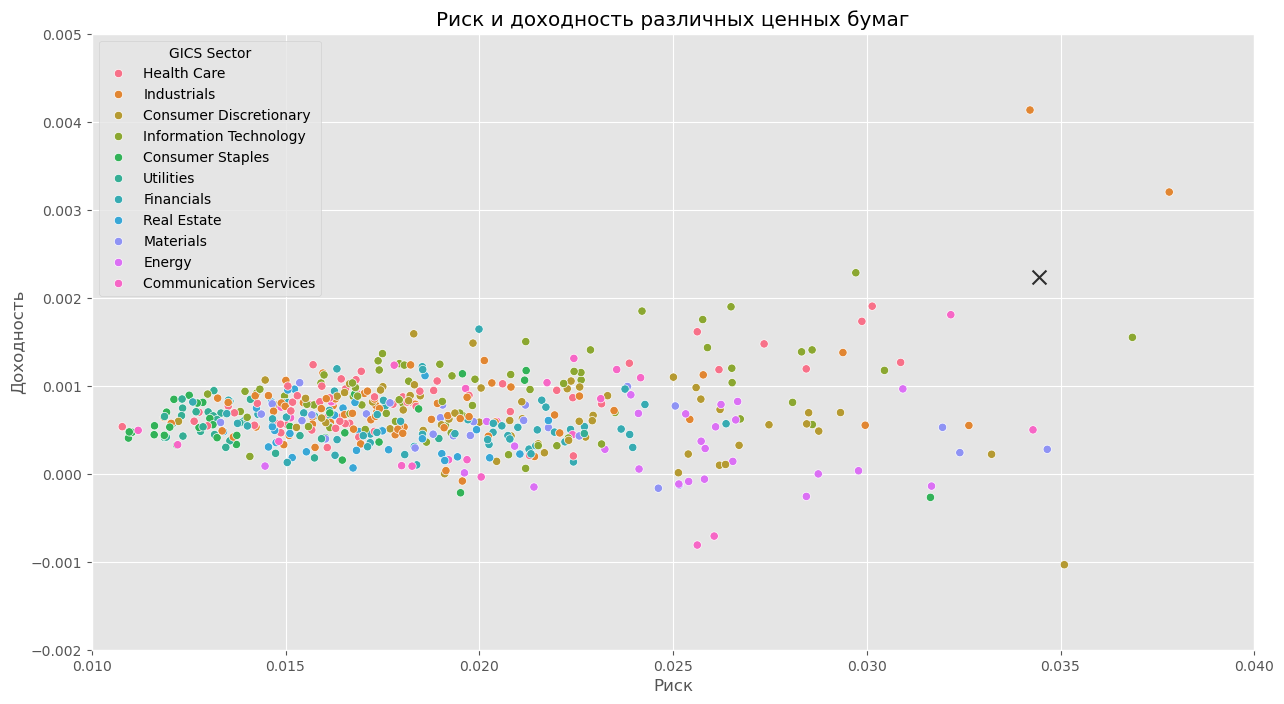

In [228]:
plt.figure(figsize=(15, 8))

sns.scatterplot(data=data, x='std', y='r', hue='GICS Sector')

tsla = data.loc['TSLA']
sns.regplot(x=[tsla['std']], y=[tsla['r']], scatter=True, fit_reg=False, 
            marker='x', color='black', scatter_kws={'s':100}) 

plt.ylim(-0.002, 0.005)
plt.xlim(0.01, 0.04)

plt.xlabel('Риск')
plt.ylabel('Доходность')
plt.title('Риск и доходность различных ценных бумаг');

Чем больше риск, тем выше потенциально может оказаться доходноcть. __Но при этом мы с более высокой вероятностью можем уйти в убыток.__ Чёрным крестиком отдельно отмечена Тесла, которая обладает довольно высокими доходностью и риском.

> Можно ли купить какую-то другую бумагу, которая обладает примерно такой же доходностью как тесла, но при этом её риск меньше? 

Сделайте группировку (`groupby`) для таблицы `data` по секторам экономики. Какой из секторов экономики обладает самым низким медианным значением риска? 

In [254]:
df_agg = data.groupby('GICS Sector')[["r", "std"]].median()
df_agg

,r,std
GICS Sector,,
Communication Services,0.000547,0.019866
Consumer Discretionary,0.000663,0.020787
Consumer Staples,0.000527,0.013180
Energy,0.000282,0.025565
Financials,0.000543,0.018323
Health Care,0.000811,0.016737
Industrials,0.000686,0.017356
Information Technology,0.000905,0.019129
Materials,0.000597,0.019193


In [257]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

df_agg = data.groupby('GICS Sector')[["r", "std"]].median()

# Формат ответа: строка, пример: 'Utilities'
min_sector = list(df_agg["std"].nsmallest(1).index)[0]
max_sector = list(df_agg["r"].nlargest(1).index)[0]



In [258]:
# проверка, что задание решено корректно
assert min_sector == 'Utilities'

# Подобные тесты скрыты от вас
### BEGIN HIDDEN TESTS
assert max_sector == 'Information Technology'
### END HIDDEN TESTS

__з)__  Надо понимать, что стандартное отклонение чувствительно к выбросам. Поэтому в качестве меры риска часто рассматривают VaR. 

__Value-at-Risk__ — одна из самых распространенных форм измерения финансовых рисков. Общепринято обозначается $VaR$.
Еще его часто называют статистика $16:15$, такое название он получил потому, что $16:15$ – это время, в которое он якобы должен лежать на столе главы правления банка JPMorgan. (В этом банке данный показатель был впервые введен с целью повышения эффективности работы с рисками).

__Value-at-Risk__ на каком-либо уровне (скажем, $5\%$) – это просто квантиль на уровне $5\%$. То есть это такая доходность, что в $95\%$ случаев у нас дела будут лучше.

Посчитайте $5\%$ VaR по всем ценным бумагам. Для этого используйте метод `quantile()`. Найдите 10 самых рискованных компаний и 10 наименее рискованных компаний с точки зрения этого показателя. Не забудьте умножить результаты на $-1$ перед сортировкой. 

In [260]:
VaR

A      -0.027683
AAL    -0.045322
AAP    -0.025752
AAPL   -0.025260
ABBV   -0.026921
          ...   
ZBH    -0.023201
ZBRA   -0.029221
ZION   -0.031424
ZM     -0.062181
ZTS    -0.022616
Name: 0.05, Length: 523, dtype: float64

In [261]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

VaR  = df_r.quantile(0.05)

# Формат ответа: массивы из 10 тикеров, отсортированных в ликсикографическом порядке 
# пример: ['CARR', 'DOCU', 'DXCM', 'HWM']
# тип данных должен быть list, не np.array
# метод .values выдаёт данные в формате np.array: array(['CARR', 'DOCU', 'DXCM', 'HWM'])
VaRtop_10 = sorted(list(VaR.nsmallest(10).index))
VaRbottom_10 = sorted(list(VaR.nlargest(10).index))



In [262]:
# проверка, что задание решено корректно
assert 'TSLA' in VaRtop_10 
assert 'HWM' in VaRtop_10 

assert 'PG' in VaRbottom_10
assert 'MCD' in VaRbottom_10

# Подобные тесты скрыты от вас
### BEGIN HIDDEN TESTS
assert sorted(list(VaRtop_10)) == ['AMD', 'CARR', 'CTVA', 'DOCU', 'HWM', 'MRNA', 'TSLA', 'TT', 'VIAC', 'ZM']
assert sorted(list(VaRbottom_10)) == ['DUK', 'ED', 'EVRG', 'JNJ', 'KO', 'MCD', 'PEP', 'PG', 'SO', 'WM']
### END HIDDEN TESTS

$VaR$ хорош тем, что описывает именно ту часть распределения, которую мы боимся. Но $VaR$ - это лучшее из $5\%$ худших случаев. А что лежит в тех $5\%$?…

__и)__  __Expected shortfall__ - это среднее значение по всем тем точкам, что оказались хуже $VaR$, То есть среднее по худшим $5\%$. Эта метрика показывает что в среднем произойдёт с нашей доходностью в этих самых плохих $5\%$ случаев. 

- Рассчитаете $ES$ для Теслы
- Предположим, что мы вложили в Теслу $1000$ долларов в один из самых неудачных дней. Сколько в среднем денег мы потеряем от этой $1000$ долларов к концу дня? 
- Сколько денег мы заработаем в $5\%$ лучших случаем к концу дня? 

__Важно:__ VaR и Es в этом пункте - отрицательные числа.

In [276]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Формат ответа: действительное число, пример: 0.073254
var_tsla = VaR['TSLA']
es_tsla  = df_r['TSLA'][df_r['TSLA'] < var_tsla].mean()
loss = es_tsla * 1000
profit = df_r['TSLA'][df_r['TSLA'] > df_r['TSLA'].quantile(0.95)].mean() * 1000

profit

89.26648534547127

In [277]:
# проверка, что задание решено корректно
assert np.abs(es_tsla + 0.073254619) < 1e-5

# Подобные тесты скрыты от вас
### BEGIN HIDDEN TESTS
assert np.abs(loss + 73.25461) < 1e-5
assert np.abs(profit - 89.26648534) < 1e-5
### END HIDDEN TESTS

## Какая метрика лучше? 

Никакая. Все рассуждения о риске – это попытки уложить функцию распределения доходностей в одно единственное число. Поэтому информация потеряется и все метрики будут не идеальны. А к чему это приведет, можно прочитать в книге Скотта Паттерсона "Кванты. Как волшебники от математики заработали миллиарды и чуть не обрушили фондовый рынок." 

Тем не менее, какие-то цифры, на которые можно было бы ориентироваться при принятии решений необходимы. Из-за этого методы оценки риска продвинулись довольно сильно вперёд и ещё появятся в будущих домашних заданиях нашего курса. 

<center>
<img src="memes01.png" width="500"> 
</center>